In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (12, 8)

![](http://www.ken-szulczyk.com/misc/statistics/linear_regression.png)  

Задача: найти модель, наилучшим образом описывающую точки $(x_i, y_i)$ with $i=1,2,...n,$

$$f(x) = a\cdot x + b$$

В матричных обозначениях $$\pmb X \; \pmb a = \pmb y$$

$$\Rightarrow\Bigg[ \begin{array}{cc}
x_1 & 1  \\
... & 1 \\
x_n & 1  \end{array} \Bigg]
\bigg[ \begin{array}{c}
a  \\
b \end{array} \bigg]
=\Bigg[ \begin{array}{c}
y_1   \\
...  \\
y_n  \end{array} \Bigg]$$

$$\Rightarrow \pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$$

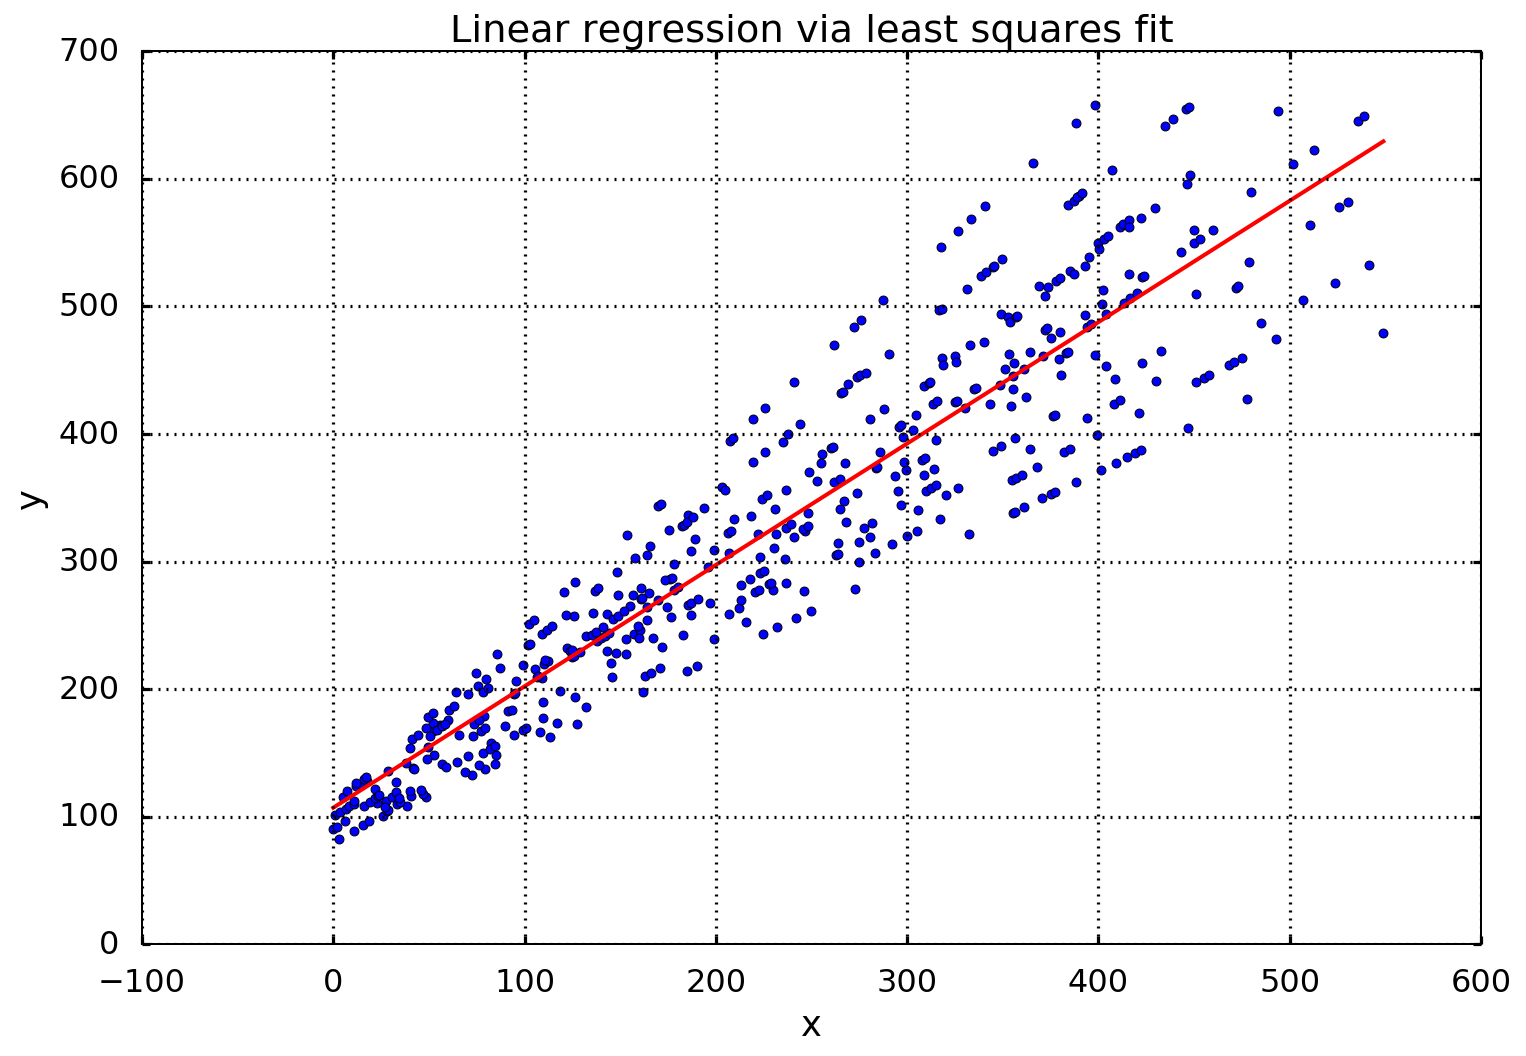

In [2]:
"""
Генерируем данные и строим для них аппроксимируем их линейной моделью
"""

import random

random.seed(12345)

x = np.array([x_i*random.randrange(8, 12)/10 for x_i in range(500)])
y = np.array([y_i*random.randrange(8, 12)/10 for y_i in range(100, 600)])

X = np.column_stack([
    x**0, x
])

w = np.linalg.inv(X.T@X)@X.T@y

plt.scatter(x, y)
plt.plot(x, X@w, color='red', lw='2')
plt.grid(True)

plt.ylabel('y')
plt.xlabel('x')
plt.title('Linear regression via least squares fit')

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())

In [4]:
n_points = 25
x = np.linspace(0, 1, n_points)

y_true = np.cos(1.5*math.pi*x)
y = y_true + np.random.normal(scale=0.1, size=n_points)

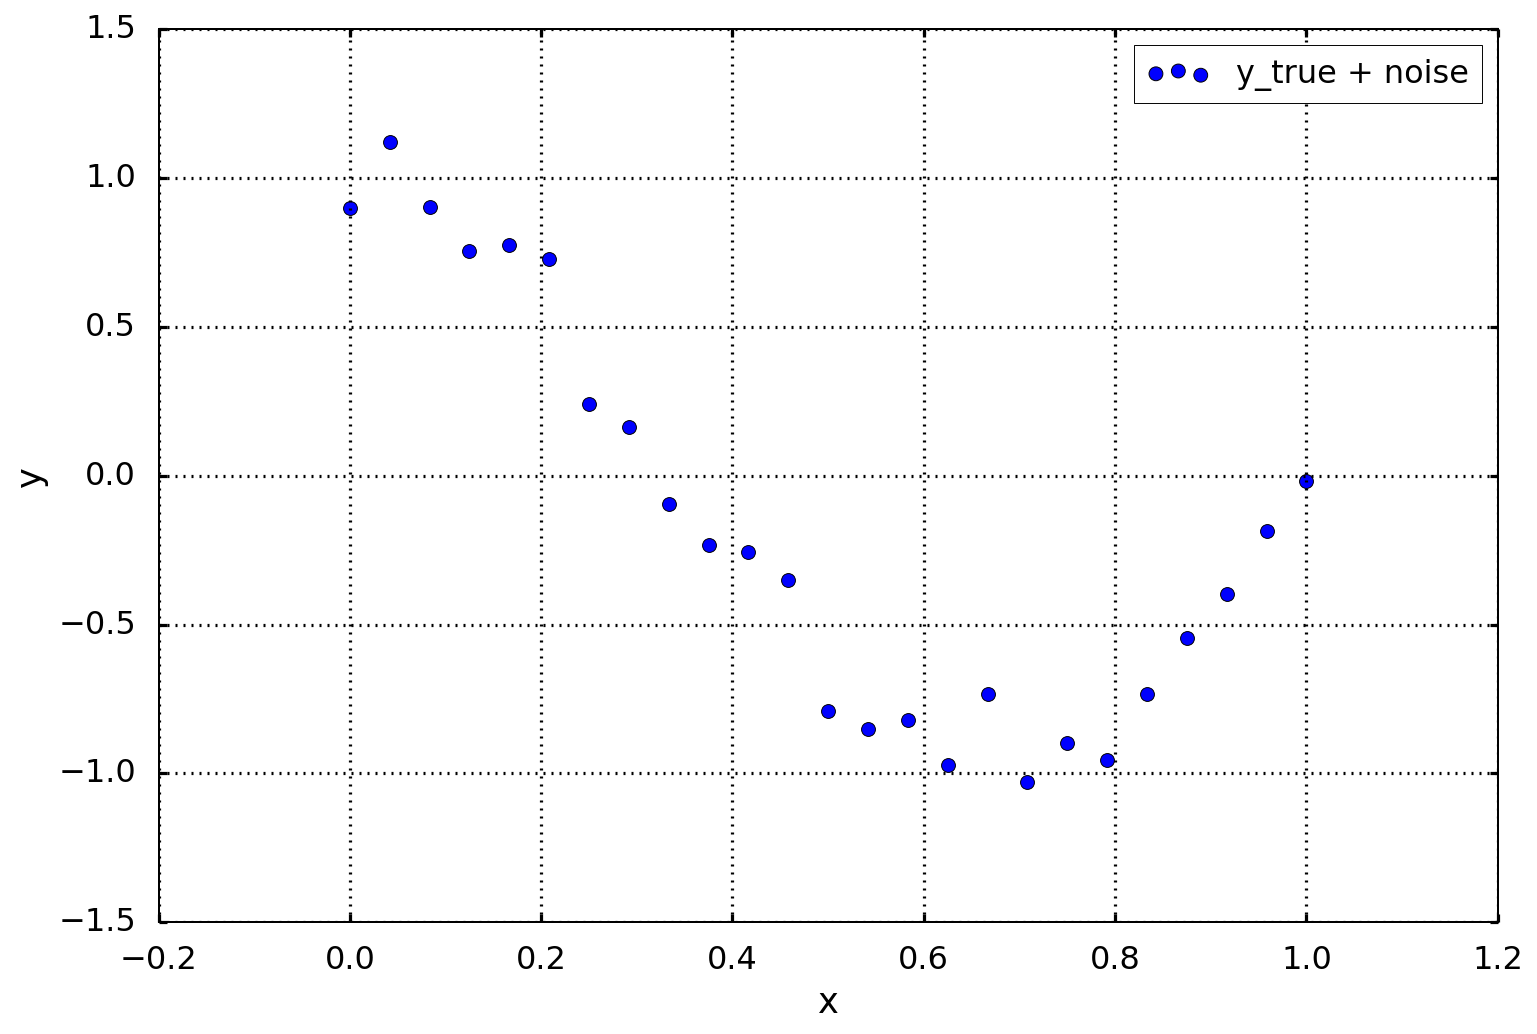

In [6]:
plt.scatter(x, y, s=48, label='y_true + noise')
#plt.plot(x, y_true, 'r--', label='y_true')

plt.grid(True)
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best');

In [23]:
X = np.c_[
    x**0, x, x**2, x**3, x**4
]

In [24]:
w = np.linalg.inv(X.T@X)@X.T@y

In [25]:
w

array([  0.97428493,   1.05820933, -20.01406242,  27.43863635,  -9.45155853])

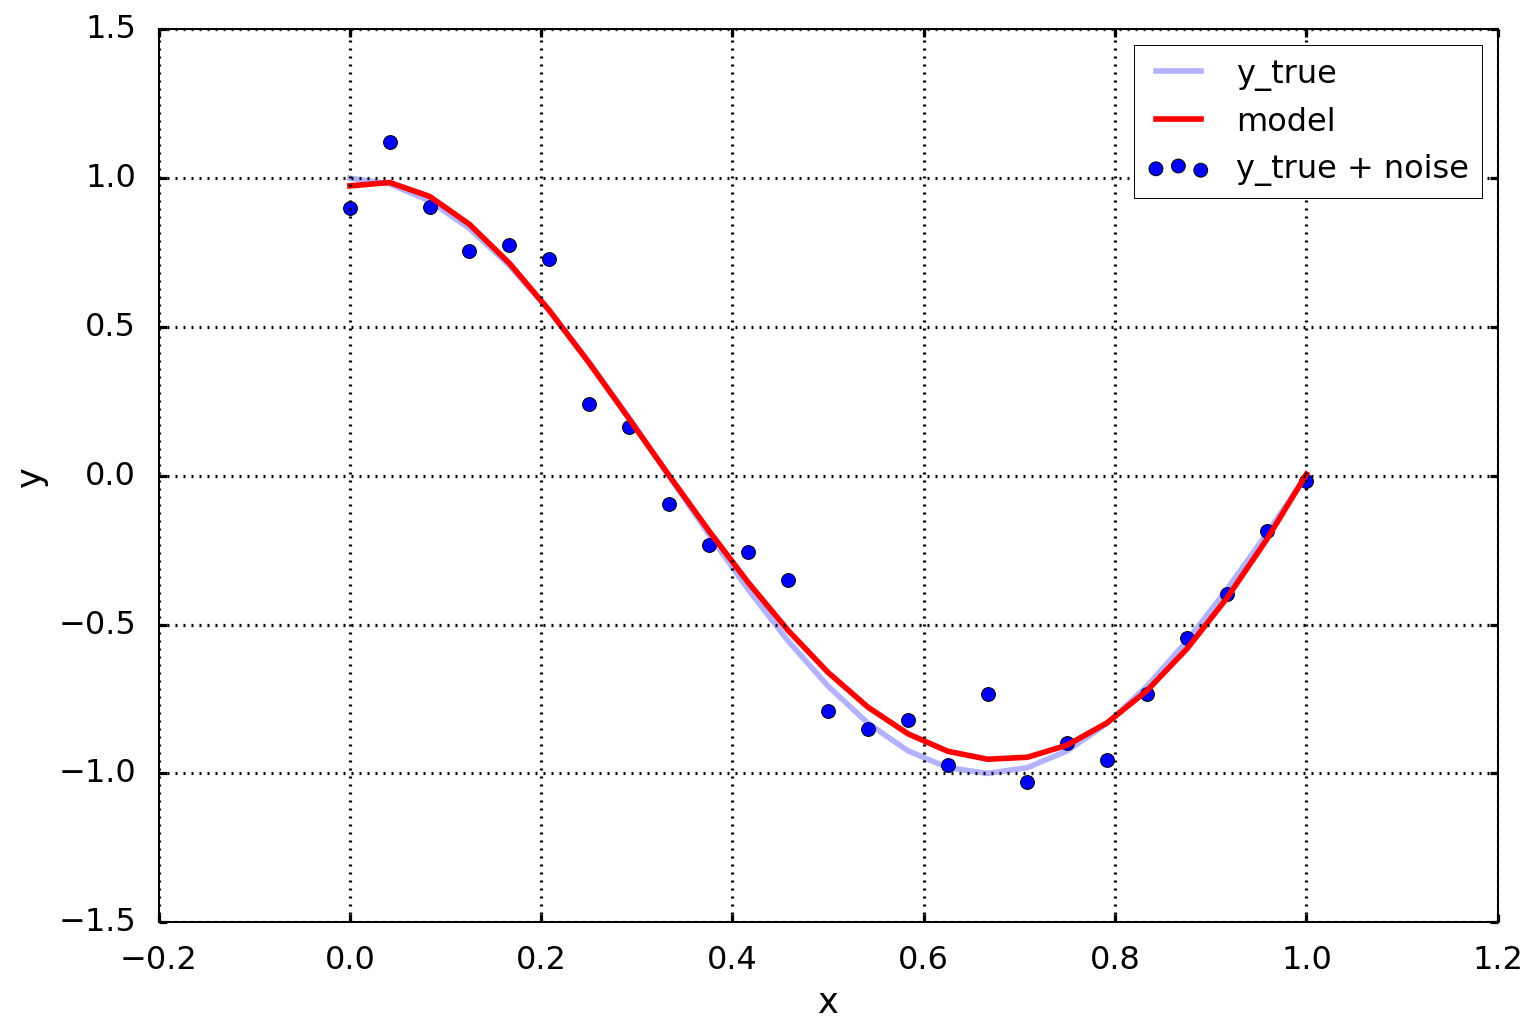

In [26]:
plt.scatter(x, y, s=48, label='y_true + noise')
plt.plot(x, y_true, 'b', label='y_true', alpha=0.3)
plt.plot(x, X@w, 'r', label='model')

plt.grid(True)
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='best');